# 电影评论的倾向性分类

In [1]:
#读入数据
import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #查看第1条评论数据和标签，第1、2条数据长度
print(train_data[0])
print(train_labels[0]) #标签值1
print(len(train_data[0]),len(train_data[1])) # 第1条长度218，第2条长度189

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
218 189


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np
#本函数转换序列集合到(样本数, 10000)维数组，每行存一条评论的编码，有词的位置为1，其他为0
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
#数据向量化。调用函数vectorize_sequences()
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
#查看转换后的结果
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [3]:
#标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0]) #值为1.0

1.0


In [4]:
#构建神经网络
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #隐层1
model.add(layers.Dense(16, activation='relu')) #隐层2
model.add(layers.Dense(1, activation='sigmoid')) #输出层

In [5]:
#编译网络模型（直接传入字符串参数）
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:

#编译网络模型（配置自定义参数）
from keras import optimizers
from keras import losses 
from keras import metrics 

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])

In [7]:
#从训练集中留出验证集
x_val = x_train[:10000] #10000个样本作验证集Validation
partial_x_train = x_train[10000:] #其余样本作训练集
y_val = y_train[:10000] #10000个验证集样本标签
partial_y_train = y_train[10000:] #测试集样本标

In [8]:
#训练模型
history = model.fit(partial_x_train, 
partial_y_train, epochs=20, 
batch_size=512, 
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 153ms/step - loss: 0.5863 - binary_accuracy: 0.6970 - val_loss: 0.3703 - val_binary_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3099 - binary_accuracy: 0.8982 - val_loss: 0.3000 - val_binary_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2153 - binary_accuracy: 0.9339 - val_loss: 0.2784 - val_binary_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1708 - binary_accuracy: 0.9456 - val_loss: 0.2778 - val_binary_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1335 - binary_accuracy: 0.9598 - val_loss: 0.2863 - val_binary_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1080 - binary_accuracy: 0.9707 - val_loss: 0.2990 - val_binary_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - lo

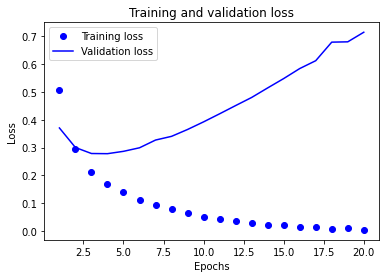

In [9]:
#绘制训练损失和验证损失随迭代次数变化图
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

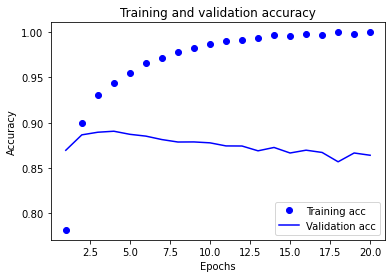

In [19]:
#绘制训练精度和验证精度随迭代次数变化图
plt.clf() 
acc = history_dict['binary_accuracy'] 
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
#训练新的模型
model.fit(x_train, y_train, epochs=4, batch_size=512)
#评估模型性能
loss,accuracy = model.evaluate(x_test, y_test)
print('loss =', loss, 'accuracy =', accuracy)
#查看预测结果，属于各类的概率
classes = model.predict(x_test)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.2319 - binary_accuracy: 0.9451
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1362 - binary_accuracy: 0.9595
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1060 - binary_accuracy: 0.9680
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.4892 - binary_accuracy: 0.8593
loss = 0.4891544282436371 accuracy = 0.859279990196228
测试样本数： 25000
分类概率:
 [[0.02036324]
 [1.        ]
 [0.3678465 ]
 ...
 [0.05988023]
 [0.04771066]
 [0.84407336]]


使用一个隐藏层

In [33]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #隐层1
model1.add(layers.Dense(16, activation='relu')) #隐层2
model1.add(layers.Dense(16, activation='relu'))#隐层3
model1.add(layers.Dense(1, activation='sigmoid')) #输出层

In [34]:
#编译网络模型（直接传入字符串参数）
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#编译网络模型（配置自定义参数）
from keras import optimizers
from keras import losses 
from keras import metrics 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])

In [35]:
model1.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])#从训练集中留出验证集
x_val = x_train[:10000] #10000个样本作验证集Validation
partial_x_train = x_train[10000:] #其余样本作训练集
y_val = y_train[:10000] #10000个验证集样本标签
partial_y_train = y_train[10000:] #测试集样本标#训练模型
history = model1.fit(partial_x_train, 
partial_y_train, epochs=20, 
batch_size=512, 
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 46s 1s/step - loss: 0.6004 - binary_accuracy: 0.7082 - val_loss: 0.3764 - val_binary_accuracy: 0.8730
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3113 - binary_accuracy: 0.9059 - val_loss: 0.2951 - val_binary_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2093 - binary_accuracy: 0.9348 - val_loss: 0.3167 - val_binary_accuracy: 0.8716
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1610 - binary_accuracy: 0.9497 - val_loss: 0.2771 - val_binary_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1288 - binary_accuracy: 0.9605 - val_loss: 0.3181 - val_binary_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1022 - binary_accuracy: 0.9690 - val_loss: 0.3416 - val_binary_accuracy: 0.8696
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss

In [36]:
#训练新的模型
model1.fit(x_train, y_train, epochs=4, batch_size=512)
#评估模型性能
loss,accuracy = model1.evaluate(x_test, y_test)
print('loss =', loss, 'accuracy =', accuracy)
#查看预测结果，属于各类的概率
classes = model.predict(x_test)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

Epoch 1/4
49/49 [==============================] - 3s 42ms/step - loss: 0.2462 - binary_accuracy: 0.9445
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1403 - binary_accuracy: 0.9594
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1089 - binary_accuracy: 0.9673
Epoch 4/4
782/782 [==============================] - 3s 2ms/step - loss: 0.4814 - binary_accuracy: 0.8582
loss = 0.4814091920852661 accuracy = 0.8582000136375427
测试样本数： 25000
分类概率:
 [[0.0176062 ]
 [0.9999306 ]
 [0.982105  ]
 ...
 [0.1630795 ]
 [0.06545752]
 [0.9153887 ]]


更多的隐藏单元，比如 32 个

In [38]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,))) #隐层1
model2.add(layers.Dense(32, activation='relu')) #隐层2
model2.add(layers.Dense(1, activation='sigmoid')) #输出层

In [39]:
#编译网络模型（直接传入字符串参数）
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#编译网络模型（配置自定义参数）
from keras import optimizers
from keras import losses 
from keras import metrics 
model2.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])

In [40]:
model2.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])#从训练集中留出验证集
x_val = x_train[:10000] #10000个样本作验证集Validation
partial_x_train = x_train[10000:] #其余样本作训练集
y_val = y_train[:10000] #10000个验证集样本标签
partial_y_train = y_train[10000:] #测试集样本标#训练模型
history = model2.fit(partial_x_train, 
partial_y_train, epochs=20, 
batch_size=512, 
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 45s 1s/step - loss: 0.5688 - binary_accuracy: 0.7153 - val_loss: 0.3627 - val_binary_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 2s 74ms/step - loss: 0.2921 - binary_accuracy: 0.9097 - val_loss: 0.3100 - val_binary_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2099 - binary_accuracy: 0.9269 - val_loss: 0.2730 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1503 - binary_accuracy: 0.9529 - val_loss: 0.3353 - val_binary_accuracy: 0.8681
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1247 - binary_accuracy: 0.9568 - val_loss: 0.3010 - val_binary_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0965 - binary_accuracy: 0.9697 - val_loss: 0.3142 - val_binary_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss

In [42]:
#训练新的模型
model2.fit(x_train, y_train, epochs=4, batch_size=512)
#评估模型性能
loss,accuracy = model2.evaluate(x_test, y_test)
print('loss =', loss, 'accuracy =', accuracy)
#查看预测结果，属于各类的概率
classes = model2.predict(x_test)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

Epoch 1/4
49/49 [==============================] - 4s 42ms/step - loss: 0.0359 - binary_accuracy: 0.9904: 3s - loss: 0.0277 -
Epoch 2/4
49/49 [==============================] - 2s 45ms/step - loss: 0.0264 - binary_accuracy: 0.9927
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0164 - binary_accuracy: 0.9958
Epoch 4/4
782/782 [==============================] - 8s 5ms/step - loss: 0.8122 - binary_accuracy: 0.8574
loss = 0.8122364282608032 accuracy = 0.8574000000953674
测试样本数： 25000
分类概率:
 [[7.6112151e-04]
 [1.0000000e+00]
 [9.9999779e-01]
 ...
 [1.8949807e-03]
 [6.8402290e-03]
 [9.1281706e-01]]


# 使用 mse 损失函数代替 binary_crossentropy（精度最高）

In [43]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #隐层1
model3.add(layers.Dense(16, activation='relu')) #隐层2
model3.add(layers.Dense(1, activation='sigmoid')) #输出层#编译网络模型（直接传入字符串参数）
model3.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
#编译网络模型（配置自定义参数）
from keras import optimizers
from keras import losses 
from keras import metrics 
model3.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])#训练模型
history = model3.fit(partial_x_train, 
partial_y_train, epochs=20, 
batch_size=512, 
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 143s 4s/step - loss: 0.6091 - binary_accuracy: 0.6532 - val_loss: 0.3964 - val_binary_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3337 - binary_accuracy: 0.9002 - val_loss: 0.3089 - val_binary_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2345 - binary_accuracy: 0.9291 - val_loss: 0.2889 - val_binary_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1817 - binary_accuracy: 0.9448 - val_loss: 0.2750 - val_binary_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1475 - binary_accuracy: 0.9534 - val_loss: 0.2805 - val_binary_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1153 - binary_accuracy: 0.9676 - val_loss: 0.3071 - val_binary_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [44]:
#训练新的模型
model3.fit(x_train, y_train, epochs=4, batch_size=512)
#评估模型性能
loss,accuracy = model3.evaluate(x_test, y_test)
print('loss =', loss, 'accuracy =', accuracy)
#查看预测结果，属于各类的概率
classes = model3.predict(x_test)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

Epoch 1/4
49/49 [==============================] - 3s 26ms/step - loss: 0.2197 - binary_accuracy: 0.9457
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1317 - binary_accuracy: 0.9610
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0976 - binary_accuracy: 0.9708
Epoch 4/4
782/782 [==============================] - 6s 3ms/step - loss: 0.5011 - binary_accuracy: 0.8618
loss = 0.5011339783668518 accuracy = 0.8617600202560425
测试样本数： 25000
分类概率:
 [[0.00484279]
 [0.9999857 ]
 [0.9585514 ]
 ...
 [0.07106334]
 [0.03679386]
 [0.8623848 ]]


使用不同batch_size

In [45]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #隐层1
model4.add(layers.Dense(16, activation='relu')) #隐层2
model4.add(layers.Dense(1, activation='sigmoid')) #输出层#编译网络模型（直接传入字符串参数）
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#编译网络模型（配置自定义参数）
from keras import optimizers
from keras import losses 
from keras import metrics 
model4.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])#训练模型
history = model4.fit(partial_x_train, 
partial_y_train, epochs=20, 
batch_size=216, 
validation_data=(x_val, y_val))

Epoch 1/20
70/70 [==============================] - 229s 2s/step - loss: 0.5494 - binary_accuracy: 0.7462 - val_loss: 0.3546 - val_binary_accuracy: 0.8580
Epoch 2/20
70/70 [==============================] - 2s 23ms/step - loss: 0.2493 - binary_accuracy: 0.9194 - val_loss: 0.2768 - val_binary_accuracy: 0.8884
Epoch 3/20
70/70 [==============================] - 2s 26ms/step - loss: 0.1723 - binary_accuracy: 0.9423 - val_loss: 0.2882 - val_binary_accuracy: 0.8841
Epoch 4/20
70/70 [==============================] - 1s 17ms/step - loss: 0.1266 - binary_accuracy: 0.9575 - val_loss: 0.3049 - val_binary_accuracy: 0.8845
Epoch 5/20
70/70 [==============================] - 1s 18ms/step - loss: 0.1053 - binary_accuracy: 0.9670 - val_loss: 0.3259 - val_binary_accuracy: 0.8831
Epoch 6/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0762 - binary_accuracy: 0.9780 - val_loss: 0.3625 - val_binary_accuracy: 0.8772
Epoch 7/20
70/70 [==============================] - 2s 26ms/step - los

In [46]:
#训练新的模型
model4.fit(x_train, y_train, epochs=4, batch_size=512)
#评估模型性能
loss,accuracy = model4.evaluate(x_test, y_test)
print('loss =', loss, 'accuracy =', accuracy)
#查看预测结果，属于各类的概率
classes = model4.predict(x_test)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

Epoch 1/4
49/49 [==============================] - 4s 47ms/step - loss: 0.2899 - binary_accuracy: 0.9416: 2s - loss: 0.4822
Epoch 2/4
49/49 [==============================] - 2s 47ms/step - loss: 0.1516 - binary_accuracy: 0.9568
Epoch 3/4
49/49 [==============================] - 6s 133ms/step - loss: 0.1175 - binary_accuracy: 0.9661 2s - 
Epoch 4/4
782/782 [==============================] - 4s 2ms/step - loss: 0.5237 - binary_accuracy: 0.8579
loss = 0.5237368941307068 accuracy = 0.8579199910163879
测试样本数： 25000
分类概率:
 [[0.01326418]
 [1.        ]
 [0.9847597 ]
 ...
 [0.25990385]
 [0.16812077]
 [0.36221075]]


设置一定验证精度停止训练(结果在第四次停止)

In [16]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #隐层1
model5.add(layers.Dense(16, activation='relu')) #隐层2
model5.add(layers.Dense(1, activation='sigmoid')) #输出层#编译网络模型（直接传入字符串参数）


callback = keras.callbacks.EarlyStopping(patience=1)
# EarlyStopping是Callbacks的一种，callbacks用于指定在每个epoch开始和结束的时候进行哪种特定操作。Callbacks中有一些设置好的接口，可以直接使用，如’acc’, 'val_acc’, ’loss’ 和 ’val_loss’等等。
# EarlyStopping则是用于提前停止训练的callbacks。具体地，可以达到当训练集上的loss不在减小（即减小的程度小于某个阈值）的时候停止继续训练。

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#编译网络模型（配置自定义参数）
from keras import optimizers
from keras import losses 
from keras import metrics 
model5.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy, 
metrics=[metrics.binary_accuracy])#训练模型
history = model5.fit(partial_x_train, 
partial_y_train, epochs=20, 
batch_size=512, callbacks=[callback],
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5874 - binary_accuracy: 0.6889 - val_loss: 0.4190 - val_binary_accuracy: 0.8174
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3079 - binary_accuracy: 0.8943 - val_loss: 0.2983 - val_binary_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2101 - binary_accuracy: 0.9366 - val_loss: 0.2737 - val_binary_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1609 - binary_accuracy: 0.9509 - val_loss: 0.2756 - val_binary_accuracy: 0.8894


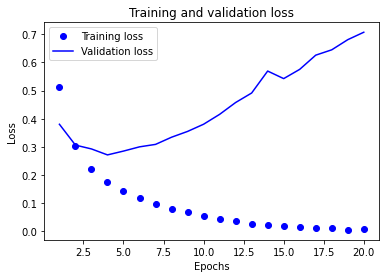

In [52]:
#绘制训练损失和验证损失随迭代次数变化图
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

在第四次迭代停下与图中结果一致

In [53]:
#训练新的模型
model5.fit(x_train, y_train, epochs=4, batch_size=512)
#评估模型性能
loss,accuracy = model5.evaluate(x_test, y_test)
print('loss =', loss, 'accuracy =', accuracy)
#查看预测结果，属于各类的概率
classes = model5.predict(x_test)
print('测试样本数：',len(classes))
print("分类概率:\n",classes)

Epoch 1/4
49/49 [==============================] - 3s 33ms/step - loss: 0.2376 - binary_accuracy: 0.9454: 0s - loss: 0.2503 - binary_accuracy:
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1414 - binary_accuracy: 0.9586
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1131 - binary_accuracy: 0.9668
Epoch 4/4
782/782 [==============================] - 4s 3ms/step - loss: 0.4894 - binary_accuracy: 0.8610
loss = 0.48943573236465454 accuracy = 0.8610399961471558
测试样本数： 25000
分类概率:
 [[0.02872968]
 [1.        ]
 [0.98669153]
 ...
 [0.0766882 ]
 [0.07982689]
 [0.87750506]]


综上，精度最高的是使用 mse 损失函数代替 binary_crossentropy，其他与原始做法相同的版本